<a href="https://colab.research.google.com/github/rifyalt/vial/blob/master/Scrapping_Data_Twitter_traveloka_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting Colab with Google Drive

In [1]:
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

Mounted at /content/drive


## Install PIP

In [2]:
# Install Library
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Library

In [3]:
# Import Library
import tweepy
import pandas as pd
import numpy as np

### Request Key

In [4]:
api_key = 'hKwFi5MHlO8B3MWuinYTMpNSU'
api_key_secret = 'E5YXbwuQiQajZodT64QEOfdbqKViHtO6pHJTbBjNPLEorCoWWO'

In [5]:
access_token = '1199758897-GrgceZA0xxFW0xSIZc6nvrpP3BSWLtK4db9NKKQ'
access_token_secret = 'p1QiZc5J61wyuRKmtgIeA72UW5VAqJtyAhV5njVhokV58'

In [6]:
# Auth.
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

### Get tweet

In [7]:
# Finding tweets by Keyword
# tweets = api.search('traveloka', count=10000, lang='id', since='2022-08-31', until='2022-09-07')

In [8]:
# Finding tweets by Keyword
tweets = api.search('promo hotel', count=10000, lang='id')

In [9]:
tweets

[Status(_api=<tweepy.api.API object at 0x7f727dcf9ad0>, _json={'created_at': 'Fri Sep 09 09:17:29 +0000 2022', 'id': 1568166695373529088, 'id_str': '1568166695373529088', 'text': '#hotel #bali #balihotel #discount Promo Hotel Di Bali Bali Baliku Beach Front Luxury Private Pool Villa Jimbaran https://t.co/m1a0Rn9Aop', 'truncated': False, 'entities': {'hashtags': [{'text': 'hotel', 'indices': [0, 6]}, {'text': 'bali', 'indices': [7, 12]}, {'text': 'balihotel', 'indices': [13, 23]}, {'text': 'discount', 'indices': [24, 33]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/m1a0Rn9Aop', 'expanded_url': 'http://goo.gl/DpWtE5', 'display_url': 'goo.gl/DpWtE5', 'indices': [113, 136]}]}, 'metadata': {'iso_language_code': 'in', 'result_type': 'recent'}, 'source': '<a href="http://www.hoteldibali.info/" rel="nofollow">hoteldibali.info</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_t

In [10]:
# Print the collected tweet
data = pd.DataFrame()
data['Created At'] = [tweet.created_at for tweet in tweets]
data['Screen Name'] = [tweet.user.screen_name for tweet in tweets]
data['Tweet'] = [tweet.text for tweet in tweets]
data['Location'] = [tweet.user.location for tweet in tweets]
data['Number of Retweet'] = [tweet.retweet_count for tweet in tweets]
data['Number of Like'] = [tweet.favorite_count for tweet in tweets]

In [11]:
display(data.head(10000))

,Created At,Screen Name,Tweet,Location,Number of Retweet,Number of Like
0,2022-09-09 09:17:29,allhotelbali,#hotel #bali #balihotel #discount Promo Hotel ...,"Denpasar,Bali",0,0
1,2022-09-09 09:07:28,Jhoonymee1,RT @mahestiericha: CIBITUNG INCLUDE HOTEL 💦Har...,,7,0
2,2022-09-09 09:07:01,Jhoonymee1,RT @MahesEricha: CIBITUNG INCLUDE HOTEL 💦Hari ...,,9,0
3,2022-09-09 08:20:59,henni_sianipar,RT @tiket: Buat yang ingin staycation ke luar ...,Indonesia,6,0
4,2022-09-09 08:17:31,allhotelbali,#hotel #bali #balihotel #discount Promo Hotel ...,"Denpasar,Bali",0,0
...,...,...,...,...,...,...
57,2022-09-08 09:26:45,unusrokok,Pas banget mau liburan eh ada promo diskon hot...,,0,0
58,2022-09-08 09:17:30,allhotelbali,#hotel #bali #balihotel #discount Promo Hotel ...,"Denpasar,Bali",0,0
59,2022-09-08 09:12:21,rwetpol,"promo #DuarDuarKembar99 nih bestie, satsetsats...",,0,0
60,2022-09-08 09:08:53,Nikitajani11,Asik liburan bisa pesen hotel lebih murah kare...,,0,0


In [12]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

## Convert to Pandas

In [13]:
df = pd.DataFrame(display(data.head(10000)))

,Created At,Screen Name,Tweet,Location,Number of Retweet,Number of Like
0,2022-09-09 09:17:29,allhotelbali,#hotel #bali #balihotel #discount Promo Hotel ...,"Denpasar,Bali",0,0
1,2022-09-09 09:07:28,Jhoonymee1,RT @mahestiericha: CIBITUNG INCLUDE HOTEL 💦Har...,,7,0
2,2022-09-09 09:07:01,Jhoonymee1,RT @MahesEricha: CIBITUNG INCLUDE HOTEL 💦Hari ...,,9,0
3,2022-09-09 08:20:59,henni_sianipar,RT @tiket: Buat yang ingin staycation ke luar ...,Indonesia,6,0
4,2022-09-09 08:17:31,allhotelbali,#hotel #bali #balihotel #discount Promo Hotel ...,"Denpasar,Bali",0,0
...,...,...,...,...,...,...
57,2022-09-08 09:26:45,unusrokok,Pas banget mau liburan eh ada promo diskon hot...,,0,0
58,2022-09-08 09:17:30,allhotelbali,#hotel #bali #balihotel #discount Promo Hotel ...,"Denpasar,Bali",0,0
59,2022-09-08 09:12:21,rwetpol,"promo #DuarDuarKembar99 nih bestie, satsetsats...",,0,0
60,2022-09-08 09:08:53,Nikitajani11,Asik liburan bisa pesen hotel lebih murah kare...,,0,0


In [14]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Web Scraping/twitter/promohotel.csv', index=True)

## Stopwords

In [15]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Web Scraping/twitter/promohotel.csv')

In [16]:
dataset

,Unnamed: 0,Created At,Screen Name,Tweet,Location,Number of Retweet,Number of Like
0,0,2022-09-09 09:17:29,allhotelbali,#hotel #bali #balihotel #discount Promo Hotel ...,"Denpasar,Bali",0,0
1,1,2022-09-09 09:07:28,Jhoonymee1,RT @mahestiericha: CIBITUNG INCLUDE HOTEL 💦Har...,NaN,7,0
2,2,2022-09-09 09:07:01,Jhoonymee1,RT @MahesEricha: CIBITUNG INCLUDE HOTEL 💦Hari ...,NaN,9,0
3,3,2022-09-09 08:20:59,henni_sianipar,RT @tiket: Buat yang ingin staycation ke luar ...,Indonesia,6,0
4,4,2022-09-09 08:17:31,allhotelbali,#hotel #bali #balihotel #discount Promo Hotel ...,"Denpasar,Bali",0,0
...,...,...,...,...,...,...,...
57,57,2022-09-08 09:26:45,unusrokok,Pas banget mau liburan eh ada promo diskon hot...,NaN,0,0
58,58,2022-09-08 09:17:30,allhotelbali,#hotel #bali #balihotel #discount Promo Hotel ...,"Denpasar,Bali",0,0
59,59,2022-09-08 09:12:21,rwetpol,"promo #DuarDuarKembar99 nih bestie, satsetsats...",NaN,0,0
60,60,2022-09-08 09:08:53,Nikitajani11,Asik liburan bisa pesen hotel lebih murah kare...,NaN,0,0


In [17]:
label = dataset['Tweet']

In [18]:
label

0     #hotel #bali #balihotel #discount Promo Hotel ...
1     RT @mahestiericha: CIBITUNG INCLUDE HOTEL 💦Har...
2     RT @MahesEricha: CIBITUNG INCLUDE HOTEL 💦Hari ...
3     RT @tiket: Buat yang ingin staycation ke luar ...
4     #hotel #bali #balihotel #discount Promo Hotel ...
                            ...                        
57    Pas banget mau liburan eh ada promo diskon hot...
58    #hotel #bali #balihotel #discount Promo Hotel ...
59    promo #DuarDuarKembar99 nih bestie, satsetsats...
60    Asik liburan bisa pesen hotel lebih murah kare...
61    Asik ni ada promo menarik dari traveloka guys ...
Name: Tweet, Length: 62, dtype: object

In [19]:
!pip install -q wordcloud

In [20]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
processed_features = []

for sentence in range(0, len(label)):
  # Remove all the special characters
  processed_feature = re.sub(r'\W', ' ', str(label[sentence]))
  
  # remove all single characters
  processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
  
  # Remove single characters from the start
  processed_feature = re.sub(r'^[a-zA-Z]\s+', '', processed_feature)
  
  # Substituting multiple spaces with single space
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
  
  # Removing prefixed ‘b’
  processed_feature = re.sub(r'^b\s+', '', processed_feature)
  # Converting to Lowercase
  processed_feature = processed_feature.lower()
  processed_features.append(processed_feature)

In [22]:
import nltk
nltk.download('punkt') # Sentence Tokenizer
nltk.download('stopwords') # Stopword

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
from nltk.corpus import stopwords

stop=nltk.corpus.stopwords.words('indonesian')
label = label.apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [24]:
label = label.str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [25]:
label.head()

0    hotel bali balihotel discount Promo Hotel Di B...
1    RT mahestiericha CIBITUNG INCLUDE HOTEL Hari s...
2    RT MahesEricha CIBITUNG INCLUDE HOTEL Hari sam...
3    RT tiket Buat staycation negeri promo berlaku ...
4    hotel bali balihotel discount Promo Hotel Di B...
Name: Tweet, dtype: object

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

word_string=''.join(label.str.upper())
wordcloud = WordCloud(stopwords=STOPWORDS, 
                          background_color="dimgrey",
                          colormap='Pastel1', 
                          width = 3000,
                          height = 2000).generate(word_string)

In [27]:
pd.set_option('max_colwidth', 1000)

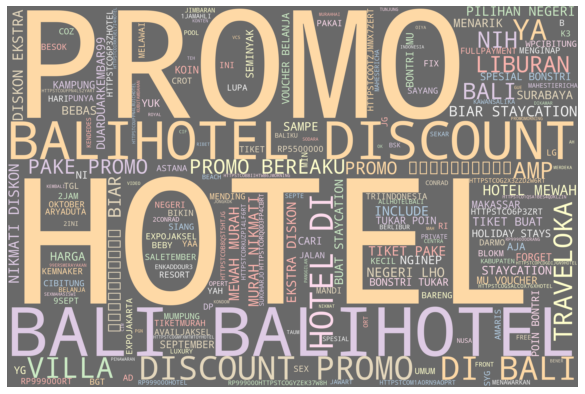

In [28]:
plt.figure(figsize=(20,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()